# Dataset prep

In [33]:
%matplotlib inline

from tqdm.notebook import tqdm
import pickle
import matplotlib.pyplot as plt
import numpy as np

# original source https://ftp.wwpdb.org/pub/pdb/derived_data/pdb_seqres.txt.gz
SEQ_FILE = "data/pdb_seqres.txt"

In [16]:
with open(SEQ_FILE) as f:
    lines = f.readlines()

At first, we'll try to keep `mol:protein` types, and only one of each name (the first one)

In [17]:
names = set()

name_to_seq = dict()

for l in tqdm(lines):
    if l.startswith(">"):
        keep = False
        is_prot = "mol:protein" in l
        if is_prot:
            name = " ".join(l.split()[3:])
            if name not in names:
                names.add(name)
                keep = True
    elif keep:
        name_to_seq[name] = l.strip()

  0%|          | 0/1542264 [00:00<?, ?it/s]

In [18]:
name_to_seq["PROTEIN (UPSTREAM STIMULATORY FACTOR)"]

'MDEKRRAQHNEVERRRRDKINNWIVQLSKIIPDSSMESTKSGQSKGGILSKASDYIQELRQSNHR'

In [31]:
print("number sequences:", len(name_to_seq))
print("number tokens:", len(set("".join(name_to_seq.values()))))

number sequences: 81583
number tokens: 24


In [20]:
with open("data/seq_01.pkl", "wb") as f:
    pickle.dump(name_to_seq, f)

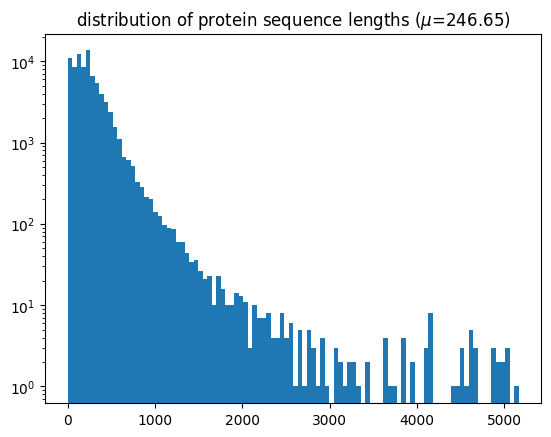

In [35]:
lengths = [len(seq) for seq in name_to_seq.values()]
plt.hist(lengths, bins=100, log=True);
plt.title("distribution of protein sequence lengths ($\mu$={:.2f})".format(np.mean(lengths)));

### Prep final text file
One protein sequence per line (~ 19 MB)

In [37]:
with open("data/seq_01.txt", "w") as f:
    f.write("\n".join(name_to_seq.values()))